In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
emp=pd.read_csv('Satisfy file.csv')
emp

,EmployeeID,Survey,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,satisfact_score
0,100001,2023Q2,3,3,1,3,2,2,4,2,4,3,2.7
1,100002,2023Q2,3,4,4,4,4,4,1,5,4,1,3.4
2,100009,2023Q2,3,4,3,3,4,2,1,3,3,4,3.0
3,100014,2023Q2,4,1,2,3,3,3,4,2,3,2,2.7
4,100018,2023Q2,4,1,1,3,3,4,3,2,2,3,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,104964,2023Q2,3,3,4,1,1,2,4,1,3,3,2.5
2823,104965,2023Q2,4,4,2,3,1,4,1,4,1,4,2.8
2824,104966,2023Q2,3,3,3,2,4,3,3,3,4,3,3.1
2825,104967,2023Q2,3,1,4,3,3,4,2,3,3,3,2.9


In [3]:
info=pd.read_excel("Emp_info.xlsx")
info

,EmployeeID,First_Name,Surname,StreetAddress,City,State,StateFull,ZipCode,Country,CountryFull,...,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,Notes
0,100001,Patrice,Moore,1427 Buckhannan Avenue,North Syracuse,NY,New York,13212,US,United States,...,Corporate,USD,1.00,CEO,1986-01-05,CSuite,500000,1,JP_1000,Changes for 2021.06:
1,100002,David,Rickards,4265 Graystone Lakes,Macon,GA,Georgia,31206,US,United States,...,Corporate,USD,0.20,HR Manager,1971-07-13,Manager,70000,1,JP_1001,Changes for 2021.06:
2,100003,Grace,Maldonado,1680 Hudson Street,Weehawken,NJ,New Jersey,7087,US,United States,...,Marketing,USD,0.15,Graphic Designer,1989-01-25,Individual Contributor,77000,0,JP_1022,Changes for 2021.06:
3,100004,Justin,Edgin,1262 Limer Street,Rome,GA,Georgia,30165,US,United States,...,Technology,USD,0.50,CTO,1996-05-01,CSuite,400000,0,JP_1036,Changes for 2021.06:
4,100005,Benjamin,Vargas,2431 Rainbow Road,Santa Ana,CA,California,92705,US,United States,...,Customer Service,USD,0.15,Associate Account Manager,1972-05-05,Manager,51000,0,JP_1015,Changes for 2021.06:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,104964,John,Simpson,1381 Neville Street,Evansville,Indiana,Indiana,47711,US,United States,...,Marketing,USD,0.50,Chief Marketing Officer,1950-11-27,CSuite,370000,1,JP_1045,"Changes for 2021.06: Added on 2021.06, Termed"
4964,104965,Teresa,Nation,3336 Fleming Way,Richmond,Virginia,Virginia,23233,US,United States,...,Technology,USD,0.15,Software Engineer,1975-07-05,Individual Contributor,77000,1,JP_1038,"Changes for 2021.06: Added on 2021.06,"
4965,104966,Lashandra,Hall,226 White River Way,Salt Lake City,Utah,Utah,84111,US,United States,...,Sales,USD,0.15,Sales Team Lead,1982-04-03,Senior,85500,1,JP_1034,"Changes for 2021.06: Added on 2021.06,"
4966,104967,Clara,Weisberg,3318 Maxwell Farm Road,Chico,California,California,95926,US,United States,...,Technology,USD,0.15,Senior Software Engineer,2001-06-18,Senior,98000,1,JP_1040,"Changes for 2021.06: Added on 2021.06,"


In [4]:
E=pd.merge(emp,info,on="EmployeeID")
E

,EmployeeID,Survey,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,...,Department,Currency,Bonus_pct,Job_title,DOB,level,Salary,Active Status,Job_Profile,Notes
0,100001,2023Q2,3,3,1,3,2,2,4,2,...,Corporate,USD,1.00,CEO,1986-01-05,CSuite,500000,1,JP_1000,Changes for 2021.06:
1,100002,2023Q2,3,4,4,4,4,4,1,5,...,Corporate,USD,0.20,HR Manager,1971-07-13,Manager,70000,1,JP_1001,Changes for 2021.06:
2,100009,2023Q2,3,4,3,3,4,2,1,3,...,Sales,USD,0.20,"Director, Sales",1992-01-04,Director,74000,1,JP_1030,Changes for 2021.06:
3,100014,2023Q2,4,1,2,3,3,3,4,2,...,Corporate,USD,0.15,AP Specialist,1997-10-29,Individual Contributor,67000,1,JP_1003,Changes for 2021.06:
4,100018,2023Q2,4,1,1,3,3,4,3,2,...,Customer Service,USD,0.30,"SVP, Customer Service",1993-06-20,SVP,198000,1,JP_1017,Changes for 2021.06:
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,104964,2023Q2,3,3,4,1,1,2,4,1,...,Marketing,USD,0.50,Chief Marketing Officer,1950-11-27,CSuite,370000,1,JP_1045,"Changes for 2021.06: Added on 2021.06, Termed"
2823,104965,2023Q2,4,4,2,3,1,4,1,4,...,Technology,USD,0.15,Software Engineer,1975-07-05,Individual Contributor,77000,1,JP_1038,"Changes for 2021.06: Added on 2021.06,"
2824,104966,2023Q2,3,3,3,2,4,3,3,3,...,Sales,USD,0.15,Sales Team Lead,1982-04-03,Senior,85500,1,JP_1034,"Changes for 2021.06: Added on 2021.06,"
2825,104967,2023Q2,3,1,4,3,3,4,2,3,...,Technology,USD,0.15,Senior Software Engineer,2001-06-18,Senior,98000,1,JP_1040,"Changes for 2021.06: Added on 2021.06,"


In [5]:
E.columns

Index(['EmployeeID', 'Survey', 'Recomnd', 'engage', 'mang_support',
       'growth_room', 'recog_for_work', 'Gd_carre_oppo', 'stay2_yr',
       'fair_compe', 'value_align', 'PTO', 'satisfact_score', 'First_Name',
       'Surname', 'StreetAddress', 'City', 'State', 'StateFull', 'ZipCode',
       'Country', 'CountryFull', 'Age', 'Office', 'Start_Date',
       'Termination_Date', 'Office_Type', 'Department', 'Currency',
       'Bonus_pct', 'Job_title', 'DOB', 'level', 'Salary', 'Active Status',
       'Job_Profile', 'Notes'],
      dtype='object')

# Data Pre-Processing

In [6]:
data=E.loc[:,['EmployeeID','Country','Office_Type', 'Department','Job_title','level',]]

In [7]:
#select only data having numerical columns
Emp=E.select_dtypes(include=np.number)
Emp

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,satisfact_score,Age,Bonus_pct,Salary,Active Status
0,100001,3,3,1,3,2,2,4,2,4,3,2.7,35,1.00,500000,1
1,100002,3,4,4,4,4,4,1,5,4,1,3.4,49,0.20,70000,1
2,100009,3,4,3,3,4,2,1,3,3,4,3.0,29,0.20,74000,1
3,100014,4,1,2,3,3,3,4,2,3,2,2.7,23,0.15,67000,1
4,100018,4,1,1,3,3,4,3,2,2,3,2.6,28,0.30,198000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,104964,3,3,4,1,1,2,4,1,3,3,2.5,70,0.50,370000,1
2823,104965,4,4,2,3,1,4,1,4,1,4,2.8,46,0.15,77000,1
2824,104966,3,3,3,2,4,3,3,3,4,3,3.1,39,0.15,85500,1
2825,104967,3,1,4,3,3,4,2,3,3,3,2.9,20,0.15,98000,1


In [8]:
Emp=Emp.drop('satisfact_score',axis=1)

In [9]:
Emp

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,Age,Bonus_pct,Salary,Active Status
0,100001,3,3,1,3,2,2,4,2,4,3,35,1.00,500000,1
1,100002,3,4,4,4,4,4,1,5,4,1,49,0.20,70000,1
2,100009,3,4,3,3,4,2,1,3,3,4,29,0.20,74000,1
3,100014,4,1,2,3,3,3,4,2,3,2,23,0.15,67000,1
4,100018,4,1,1,3,3,4,3,2,2,3,28,0.30,198000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,104964,3,3,4,1,1,2,4,1,3,3,70,0.50,370000,1
2823,104965,4,4,2,3,1,4,1,4,1,4,46,0.15,77000,1
2824,104966,3,3,3,2,4,3,3,3,4,3,39,0.15,85500,1
2825,104967,3,1,4,3,3,4,2,3,3,3,20,0.15,98000,1


In [10]:
Emp=Emp.drop(['Age','Bonus_pct','Salary','Active Status'],axis=1)


In [11]:
Emp

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO
0,100001,3,3,1,3,2,2,4,2,4,3
1,100002,3,4,4,4,4,4,1,5,4,1
2,100009,3,4,3,3,4,2,1,3,3,4
3,100014,4,1,2,3,3,3,4,2,3,2
4,100018,4,1,1,3,3,4,3,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...
2822,104964,3,3,4,1,1,2,4,1,3,3
2823,104965,4,4,2,3,1,4,1,4,1,4
2824,104966,3,3,3,2,4,3,3,3,4,3
2825,104967,3,1,4,3,3,4,2,3,3,3


In [12]:
# Normalize all data
from sklearn.preprocessing import MinMaxScaler

diff=Emp.columns.difference(['EmployeeID'])
# create an instance of the MinMaxScaler object
scaler = MinMaxScaler()

# normalize the data
Emp[diff] = scaler.fit_transform(Emp[diff])
Emp=pd.DataFrame(Emp, columns=Emp.columns)
Emp

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO
0,100001,0.50,0.50,0.00,0.50,0.25,0.25,0.75,0.25,0.75,0.50
1,100002,0.50,0.75,0.75,0.75,0.75,0.75,0.00,1.00,0.75,0.00
2,100009,0.50,0.75,0.50,0.50,0.75,0.25,0.00,0.50,0.50,0.75
3,100014,0.75,0.00,0.25,0.50,0.50,0.50,0.75,0.25,0.50,0.25
4,100018,0.75,0.00,0.00,0.50,0.50,0.75,0.50,0.25,0.25,0.50
...,...,...,...,...,...,...,...,...,...,...,...
2822,104964,0.50,0.50,0.75,0.00,0.00,0.25,0.75,0.00,0.50,0.50
2823,104965,0.75,0.75,0.25,0.50,0.00,0.75,0.00,0.75,0.00,0.75
2824,104966,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.50,0.75,0.50
2825,104967,0.50,0.00,0.75,0.50,0.50,0.75,0.25,0.50,0.50,0.50


In [13]:
Emp.corr()

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO
EmployeeID,1.000000,0.027757,-0.014361,0.000284,-0.032038,-0.014661,-0.021761,0.030398,-0.026179,-0.013471,0.026845
Recomnd,0.027757,1.000000,-0.003016,0.018294,-0.010734,0.029022,-0.005850,0.017977,-0.008859,-0.006131,-0.018260
engage,-0.014361,-0.003016,1.000000,0.030537,-0.014056,-0.029389,0.021966,0.029013,0.016159,-0.009485,-0.003914
mang_support,0.000284,0.018294,0.030537,1.000000,0.026904,-0.015023,-0.004893,-0.000106,-0.005720,0.000258,-0.010956
growth_room,-0.032038,-0.010734,-0.014056,0.026904,1.000000,0.002042,-0.014324,-0.020456,0.003218,0.037936,0.017475
recog_for_work,-0.014661,0.029022,-0.029389,-0.015023,0.002042,1.000000,-0.009246,-0.004011,-0.021532,0.001666,0.016673
Gd_carre_oppo,-0.021761,-0.005850,0.021966,-0.004893,-0.014324,-0.009246,1.000000,0.006431,0.019779,0.017882,-0.038932
stay2_yr,0.030398,0.017977,0.029013,-0.000106,-0.020456,-0.004011,0.006431,1.000000,-0.006322,0.024229,0.025128
fair_compe,-0.026179,-0.008859,0.016159,-0.005720,0.003218,-0.021532,0.019779,-0.006322,1.000000,-0.010680,-0.004097
value_align,-0.013471,-0.006131,-0.009485,0.000258,0.037936,0.001666,0.017882,0.024229,-0.010680,1.000000,0.013014


In [14]:
Emp.columns

Index(['EmployeeID', 'Recomnd', 'engage', 'mang_support', 'growth_room',
       'recog_for_work', 'Gd_carre_oppo', 'stay2_yr', 'fair_compe',
       'value_align', 'PTO'],
      dtype='object')

In [15]:
Emp

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO
0,100001,0.50,0.50,0.00,0.50,0.25,0.25,0.75,0.25,0.75,0.50
1,100002,0.50,0.75,0.75,0.75,0.75,0.75,0.00,1.00,0.75,0.00
2,100009,0.50,0.75,0.50,0.50,0.75,0.25,0.00,0.50,0.50,0.75
3,100014,0.75,0.00,0.25,0.50,0.50,0.50,0.75,0.25,0.50,0.25
4,100018,0.75,0.00,0.00,0.50,0.50,0.75,0.50,0.25,0.25,0.50
...,...,...,...,...,...,...,...,...,...,...,...
2822,104964,0.50,0.50,0.75,0.00,0.00,0.25,0.75,0.00,0.50,0.50
2823,104965,0.75,0.75,0.25,0.50,0.00,0.75,0.00,0.75,0.00,0.75
2824,104966,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.50,0.75,0.50
2825,104967,0.50,0.00,0.75,0.50,0.50,0.75,0.25,0.50,0.50,0.50


In [16]:
Weight=[0.8,0.9,1,0.9,0.8,1,0.8,0.9,0.7,0.5]

Emp['comp_score']=((Emp.drop('EmployeeID',axis=1) * Weight).sum(axis=1))
Emp

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,comp_score
0,100001,0.50,0.50,0.00,0.50,0.25,0.25,0.75,0.25,0.75,0.50,3.350
1,100002,0.50,0.75,0.75,0.75,0.75,0.75,0.00,1.00,0.75,0.00,5.275
2,100009,0.50,0.75,0.50,0.50,0.75,0.25,0.00,0.50,0.50,0.75,4.050
3,100014,0.75,0.00,0.25,0.50,0.50,0.50,0.75,0.25,0.50,0.25,3.500
4,100018,0.75,0.00,0.00,0.50,0.50,0.75,0.50,0.25,0.25,0.50,3.250
...,...,...,...,...,...,...,...,...,...,...,...,...
2822,104964,0.50,0.50,0.75,0.00,0.00,0.25,0.75,0.00,0.50,0.50,3.050
2823,104965,0.75,0.75,0.25,0.50,0.00,0.75,0.00,0.75,0.00,0.75,3.775
2824,104966,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.50,0.75,0.50,4.300
2825,104967,0.50,0.00,0.75,0.50,0.50,0.75,0.25,0.50,0.50,0.50,4.000


In [17]:
Emp.describe()

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,comp_score
count,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000,2827.000000
mean,102732.819950,0.479926,0.482756,0.476919,0.475327,0.484613,0.480545,0.480545,0.480456,0.473912,0.478688,3.979298
std,1443.057615,0.247545,0.256443,0.254163,0.253054,0.249437,0.254510,0.255117,0.249545,0.257762,0.256137,0.681245
min,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,101481.000000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,3.525000
50%,102786.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,3.975000
75%,104030.500000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,4.450000
max,104968.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.225000


In [18]:
# select the column to normalize
col_to_normalize = 'comp_score'

# create a MinMaxScaler object
scaler = MinMaxScaler()

# normalize the selected column
col_normalized = scaler.fit_transform(Emp[col_to_normalize].values.reshape(-1, 1))

# add the normalized column back to the original DataFrame
Emp['comp_score'] = col_normalized.flatten()
Emp

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,comp_score
0,100001,0.50,0.50,0.00,0.50,0.25,0.25,0.75,0.25,0.75,0.50,0.391534
1,100002,0.50,0.75,0.75,0.75,0.75,0.75,0.00,1.00,0.75,0.00,0.798942
2,100009,0.50,0.75,0.50,0.50,0.75,0.25,0.00,0.50,0.50,0.75,0.539683
3,100014,0.75,0.00,0.25,0.50,0.50,0.50,0.75,0.25,0.50,0.25,0.423280
4,100018,0.75,0.00,0.00,0.50,0.50,0.75,0.50,0.25,0.25,0.50,0.370370
...,...,...,...,...,...,...,...,...,...,...,...,...
2822,104964,0.50,0.50,0.75,0.00,0.00,0.25,0.75,0.00,0.50,0.50,0.328042
2823,104965,0.75,0.75,0.25,0.50,0.00,0.75,0.00,0.75,0.00,0.75,0.481481
2824,104966,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.50,0.75,0.50,0.592593
2825,104967,0.50,0.00,0.75,0.50,0.50,0.75,0.25,0.50,0.50,0.50,0.529101


In [19]:
#data merging of normalize numerical and imp other
Emp=pd.merge(Emp,data,on="EmployeeID")
Emp

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,comp_score,Country,Office_Type,Department,Job_title,level
0,100001,0.50,0.50,0.00,0.50,0.25,0.25,0.75,0.25,0.75,0.50,0.391534,US,Corporate,Corporate,CEO,CSuite
1,100002,0.50,0.75,0.75,0.75,0.75,0.75,0.00,1.00,0.75,0.00,0.798942,US,Corporate,Corporate,HR Manager,Manager
2,100009,0.50,0.75,0.50,0.50,0.75,0.25,0.00,0.50,0.50,0.75,0.539683,US,Corporate,Sales,"Director, Sales",Director
3,100014,0.75,0.00,0.25,0.50,0.50,0.50,0.75,0.25,0.50,0.25,0.423280,US,Corporate,Corporate,AP Specialist,Individual Contributor
4,100018,0.75,0.00,0.00,0.50,0.50,0.75,0.50,0.25,0.25,0.50,0.370370,US,Corporate,Customer Service,"SVP, Customer Service",SVP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,104964,0.50,0.50,0.75,0.00,0.00,0.25,0.75,0.00,0.50,0.50,0.328042,US,Corporate,Marketing,Chief Marketing Officer,CSuite
2823,104965,0.75,0.75,0.25,0.50,0.00,0.75,0.00,0.75,0.00,0.75,0.481481,US,Technology,Technology,Software Engineer,Individual Contributor
2824,104966,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.50,0.75,0.50,0.592593,US,Corporate,Sales,Sales Team Lead,Senior
2825,104967,0.50,0.00,0.75,0.50,0.50,0.75,0.25,0.50,0.50,0.50,0.529101,US,Technology,Technology,Senior Software Engineer,Senior


In [20]:
# exporting final data
#Emp.to_csv("Emp_final.csv")

# Outlier detection and treatment

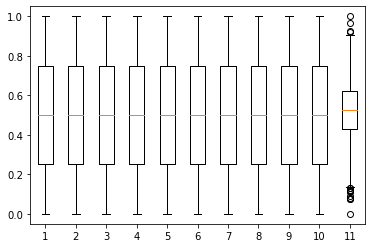

<Figure size 720x504 with 0 Axes>

In [21]:
a=plt.boxplot(Emp.iloc[:,1:12])
plt.figure(figsize=(10,7))
plt.show()

In [22]:
Q1=Emp.iloc[:,1:14].quantile(0.25)
Q3=Emp.iloc[:,1:14].quantile(0.75)
IQR=Q3-Q1

In [23]:
((Emp.iloc[:,1:14] < (Q1 - 1.5 * IQR)) | (Emp.iloc[:,1:14] > (Q3 + 1.5 * IQR))).sum()

C:\Users\Admin\AppData\Local\Temp/ipykernel_648/627761298.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((Emp.iloc[:,1:14] < (Q1 - 1.5 * IQR)) | (Emp.iloc[:,1:14] > (Q3 + 1.5 * IQR))).sum()


Country            0
Gd_carre_oppo      0
Office_Type        0
PTO                0
Recomnd            0
comp_score        15
engage             0
fair_compe         0
growth_room        0
mang_support       0
recog_for_work     0
stay2_yr           0
value_align        0
dtype: int64

In [24]:
s=pd.DataFrame(Emp[((Emp.iloc[:,1:14] < (Q1 - 1.5 * IQR)) | (Emp.iloc[:,1:14] > (Q3 + 1.5 * IQR)))].stack())
k=s.index.get_level_values(0)
m=Emp.iloc[k]
m["Job_title"]

C:\Users\Admin\AppData\Local\Temp/ipykernel_648/3484815855.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  s=pd.DataFrame(Emp[((Emp.iloc[:,1:14] < (Q1 - 1.5 * IQR)) | (Emp.iloc[:,1:14] > (Q3 + 1.5 * IQR)))].stack())


8                  Regional Sales Manager
85                      Software Engineer
309                      Graphic Designer
468     Programmatic Marketing Specialist
800                       Account Manager
894             Manager, Customer Service
1163            Manager, Customer Service
1228                      Account Manager
1357                Director, Engineering
1449                Director, Engineering
1562                           HR Analyst
2424                      Senior, Finance
2454             Senior Software Engineer
2473                    Account Executive
2608                    Account Executive
Name: Job_title, dtype: object

In [25]:
# Removing outlier for comp_score

#Quantile
q1=Emp['comp_score'].quantile(0.25)
q3=Emp['comp_score'].quantile(0.75)
IQR=q3-q1
((Emp['comp_score'] < (q1 - 1.5 * IQR)) | (Emp['comp_score'] > (q3 + 1.5 * IQR))).sum()

mask = (Emp['comp_score'] < (q1 - 1.5 * IQR)) | (Emp['comp_score'] > (q3 + 1.5 * IQR))
Emp[mask] = np.nan
Emp=Emp.dropna()

MAD = median(|Xi - median(X)|)

where:

Xi is an individual observation in the dataset X
median(X) is the median of X
|.| denotes the absolute value

Trimmed mean = mean(Xj)

where:

Xj is the set of values in the dataset X 
after removing the top and bottom p% of the values, where p is a percentage chosen by the analyst.

In [26]:
df=Emp.copy()
df

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,comp_score,Country,Office_Type,Department,Job_title,level
0,100001.0,0.50,0.50,0.00,0.50,0.25,0.25,0.75,0.25,0.75,0.50,0.391534,US,Corporate,Corporate,CEO,CSuite
1,100002.0,0.50,0.75,0.75,0.75,0.75,0.75,0.00,1.00,0.75,0.00,0.798942,US,Corporate,Corporate,HR Manager,Manager
2,100009.0,0.50,0.75,0.50,0.50,0.75,0.25,0.00,0.50,0.50,0.75,0.539683,US,Corporate,Sales,"Director, Sales",Director
3,100014.0,0.75,0.00,0.25,0.50,0.50,0.50,0.75,0.25,0.50,0.25,0.423280,US,Corporate,Corporate,AP Specialist,Individual Contributor
4,100018.0,0.75,0.00,0.00,0.50,0.50,0.75,0.50,0.25,0.25,0.50,0.370370,US,Corporate,Customer Service,"SVP, Customer Service",SVP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,104964.0,0.50,0.50,0.75,0.00,0.00,0.25,0.75,0.00,0.50,0.50,0.328042,US,Corporate,Marketing,Chief Marketing Officer,CSuite
2823,104965.0,0.75,0.75,0.25,0.50,0.00,0.75,0.00,0.75,0.00,0.75,0.481481,US,Technology,Technology,Software Engineer,Individual Contributor
2824,104966.0,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.50,0.75,0.50,0.592593,US,Corporate,Sales,Sales Team Lead,Senior
2825,104967.0,0.50,0.00,0.75,0.50,0.50,0.75,0.25,0.50,0.50,0.50,0.529101,US,Technology,Technology,Senior Software Engineer,Senior


In [27]:
#Emp.to_csv('Emp_remoutlier.csv')

In [28]:
# we check outliers for salary by z-score method 
data=Emp['comp_score']
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

outliers = detect_outliers_zscore(Emp.loc[:,'comp_score'])
out=pd.DataFrame(outliers)
out[out['comp_score']==True].count()

comp_score    0
dtype: int64

In [29]:
#we check outlier by IQR 

q1=Emp['comp_score'].quantile(0.25)
q3=Emp['comp_score'].quantile(0.75)
IQR=q3-q1
((Emp['comp_score'] < (q1 - 1.5 * IQR)) | (Emp['comp_score'] > (q3 + 1.5 * IQR))).sum()


0

As both methods showing same count for outlier, we check the distribution for salary

In [30]:
from scipy.stats import shapiro

# Assume your data is stored in a variable called 'data'
stat, p = shapiro(data)

# print the results
print('Statistic=%.3f, p-value=%.3f' % (stat, p))

# Interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistic=0.998, p-value=0.000
Sample does not look Gaussian (reject H0)


Because our data does not seems to be normal consider using non-parametric outlier detection methods. 
One such method is the Median Absolute Deviation (MAD) method. It is based on the median of the absolute deviations from the median and is less sensitive to outliers than the IQR method. Another option is 
the Modified Z-score method, which is based on the median and median absolute deviation, and is robust to outliers.

In [31]:
emp=Emp.copy()

In [32]:
print(emp["mang_support"].corr(emp["comp_score"]))

0.3785074284161043


In [33]:
emp.columns

Index(['EmployeeID', 'Recomnd', 'engage', 'mang_support', 'growth_room',
       'recog_for_work', 'Gd_carre_oppo', 'stay2_yr', 'fair_compe',
       'value_align', 'PTO', 'comp_score', 'Country', 'Office_Type',
       'Department', 'Job_title', 'level'],
      dtype='object')

In [34]:
emp=emp[['EmployeeID', 'Recomnd', 'engage', 'mang_support', 'growth_room',
       'recog_for_work', 'Gd_carre_oppo', 'stay2_yr', 'fair_compe',
       'value_align', 'PTO', 'comp_score', 'Country',
       'Office_Type', 'Department', 'Job_title', 'level',]]
emp

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,comp_score,Country,Office_Type,Department,Job_title,level
0,100001.0,0.50,0.50,0.00,0.50,0.25,0.25,0.75,0.25,0.75,0.50,0.391534,US,Corporate,Corporate,CEO,CSuite
1,100002.0,0.50,0.75,0.75,0.75,0.75,0.75,0.00,1.00,0.75,0.00,0.798942,US,Corporate,Corporate,HR Manager,Manager
2,100009.0,0.50,0.75,0.50,0.50,0.75,0.25,0.00,0.50,0.50,0.75,0.539683,US,Corporate,Sales,"Director, Sales",Director
3,100014.0,0.75,0.00,0.25,0.50,0.50,0.50,0.75,0.25,0.50,0.25,0.423280,US,Corporate,Corporate,AP Specialist,Individual Contributor
4,100018.0,0.75,0.00,0.00,0.50,0.50,0.75,0.50,0.25,0.25,0.50,0.370370,US,Corporate,Customer Service,"SVP, Customer Service",SVP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,104964.0,0.50,0.50,0.75,0.00,0.00,0.25,0.75,0.00,0.50,0.50,0.328042,US,Corporate,Marketing,Chief Marketing Officer,CSuite
2823,104965.0,0.75,0.75,0.25,0.50,0.00,0.75,0.00,0.75,0.00,0.75,0.481481,US,Technology,Technology,Software Engineer,Individual Contributor
2824,104966.0,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.50,0.75,0.50,0.592593,US,Corporate,Sales,Sales Team Lead,Senior
2825,104967.0,0.50,0.00,0.75,0.50,0.50,0.75,0.25,0.50,0.50,0.50,0.529101,US,Technology,Technology,Senior Software Engineer,Senior


In [35]:
emp.isna().value_counts()

EmployeeID  Recomnd  engage  mang_support  growth_room  recog_for_work  Gd_carre_oppo  stay2_yr  fair_compe  value_align  PTO    comp_score  Country  Office_Type  Department  Job_title  level
False       False    False   False         False        False           False          False     False       False        False  False       False    False        False       False      False    2812
dtype: int64

In [36]:
#emp.to_csv('Impute_data.csv')

# Feature Engineering

Dimensionality reduction techniques are typically employed when there is a high degree of multicollinearity or
when the dataset has a large number of features. These techniques can help in reducing noise, improving interpretability, 
and potentially enhancing the performance of certain machine learning algorithms.

However, if your independent variables are not correlated, 
it indicates that they may already be providing unique and independent information. 
In such cases, applying dimensionality reduction techniques may not be necessary, and 
it may be more appropriate to work with the original set of independent variables

In [37]:
emp.corr()

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,comp_score
EmployeeID,1.000000,0.026217,-0.013839,-0.000130,-0.034264,-0.014266,-0.022152,0.029915,-0.024476,-0.014474,0.026159,-0.019442
Recomnd,0.026217,1.000000,-0.007328,0.015258,-0.014466,0.024836,-0.008442,0.014579,-0.010301,-0.009597,-0.019628,0.294160
engage,-0.013839,-0.007328,1.000000,0.024152,-0.017506,-0.035219,0.016076,0.022256,0.012341,-0.016402,-0.006319,0.347572
mang_support,-0.000130,0.015258,0.024152,1.000000,0.021515,-0.022057,-0.012654,-0.008447,-0.010009,-0.006775,-0.015389,0.378507
growth_room,-0.034264,-0.014466,-0.017506,0.021515,1.000000,-0.004562,-0.018814,-0.025308,0.002398,0.034179,0.013507,0.335291
recog_for_work,-0.014266,0.024836,-0.035219,-0.022057,-0.004562,1.000000,-0.015602,-0.009577,-0.023964,-0.003642,0.011930,0.268251
Gd_carre_oppo,-0.022152,-0.008442,0.016076,-0.012654,-0.018814,-0.015602,1.000000,0.000109,0.017006,0.011873,-0.043340,0.369047
stay2_yr,0.029915,0.014579,0.022256,-0.008447,-0.025308,-0.009577,0.000109,1.000000,-0.010636,0.019067,0.021348,0.308235
fair_compe,-0.024476,-0.010301,0.012341,-0.010009,0.002398,-0.023964,0.017006,-0.010636,1.000000,-0.012467,-0.004692,0.326800
value_align,-0.014474,-0.009597,-0.016402,-0.006775,0.034179,-0.003642,0.011873,0.019067,-0.012467,1.000000,0.011967,0.278056


In [38]:
pip install factor_analyzer

In [39]:
emp.columns

Index(['EmployeeID', 'Recomnd', 'engage', 'mang_support', 'growth_room',
       'recog_for_work', 'Gd_carre_oppo', 'stay2_yr', 'fair_compe',
       'value_align', 'PTO', 'comp_score', 'Country', 'Office_Type',
       'Department', 'Job_title', 'level'],
      dtype='object')

In [40]:
import statsmodels.api as sm


In [41]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your independent variables are stored in a DataFrame called 'data'
ind_var=emp[['Recomnd', 'engage', 'mang_support', 'growth_room',
       'recog_for_work', 'Gd_carre_oppo', 'stay2_yr', 'fair_compe',
       'value_align', 'PTO' ]]

# Add a constant column to the independent variables matrix
ind_var = sm.add_constant(ind_var)

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = ind_var.columns
vif["VIF"] = [variance_inflation_factor(ind_var.values, i) for i in range(ind_var.shape[1])]

# Print the VIF values
print(vif)



          Variable        VIF
0            const  37.820105
1          Recomnd   1.001995
2           engage   1.003320
3     mang_support   1.002418
4      growth_room   1.003355
5   recog_for_work   1.003353
6    Gd_carre_oppo   1.003374
7         stay2_yr   1.002499
8       fair_compe   1.001481
9      value_align   1.002429
10             PTO   1.003478


The constant term (intercept) has a VIF of 196.296251, which is expected since it represents the overall intercept term in the regression model
The VIF values for all other variables are very close to 1, ranging from 1.001723 to 1.004521. This suggests that there is no substantial multicollinearity among
the independent variables, indicating that they can be considered as separate and distinct predictors in your analysis.Overall,
the low VIF values indicate that there is no significant multicollinearity present in your dataset,
and you can proceed with your analysis without concerns about high intercorrelation among the independent variables

# Exploratory Data Analysis

In [42]:
emp

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,comp_score,Country,Office_Type,Department,Job_title,level
0,100001.0,0.50,0.50,0.00,0.50,0.25,0.25,0.75,0.25,0.75,0.50,0.391534,US,Corporate,Corporate,CEO,CSuite
1,100002.0,0.50,0.75,0.75,0.75,0.75,0.75,0.00,1.00,0.75,0.00,0.798942,US,Corporate,Corporate,HR Manager,Manager
2,100009.0,0.50,0.75,0.50,0.50,0.75,0.25,0.00,0.50,0.50,0.75,0.539683,US,Corporate,Sales,"Director, Sales",Director
3,100014.0,0.75,0.00,0.25,0.50,0.50,0.50,0.75,0.25,0.50,0.25,0.423280,US,Corporate,Corporate,AP Specialist,Individual Contributor
4,100018.0,0.75,0.00,0.00,0.50,0.50,0.75,0.50,0.25,0.25,0.50,0.370370,US,Corporate,Customer Service,"SVP, Customer Service",SVP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,104964.0,0.50,0.50,0.75,0.00,0.00,0.25,0.75,0.00,0.50,0.50,0.328042,US,Corporate,Marketing,Chief Marketing Officer,CSuite
2823,104965.0,0.75,0.75,0.25,0.50,0.00,0.75,0.00,0.75,0.00,0.75,0.481481,US,Technology,Technology,Software Engineer,Individual Contributor
2824,104966.0,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.50,0.75,0.50,0.592593,US,Corporate,Sales,Sales Team Lead,Senior
2825,104967.0,0.50,0.00,0.75,0.50,0.50,0.75,0.25,0.50,0.50,0.50,0.529101,US,Technology,Technology,Senior Software Engineer,Senior


In [43]:
emp.describe()

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,comp_score
count,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,102734.097795,0.479996,0.483464,0.477863,0.475907,0.485331,0.481241,0.481419,0.480441,0.475018,0.479018,0.525789
std,1442.393614,0.247497,0.256007,0.253618,0.252649,0.248855,0.254153,0.254341,0.249456,0.257272,0.255767,0.141092
min,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137566
25%,101481.500000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.428571
50%,102787.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.526455
75%,104030.250000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.624339
max,104968.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.904762


On average, employees tend to have relatively balanced ratings across the different aspects measured, as the mean values for variables such as Recomnd, engage, mang_support, growth_room, recog_for_work, Gd_carre_oppo, stay2_yr, fair_compe, and value_align are close to 0.5.

The standard deviations of the variables are relatively small, indicating that there is not a substantial amount of variability among the ratings and scores.

The minimum values for the ratings and scores are all 0, indicating that there are employees who have provided the lowest possible rating for each aspect.

The maximum values for the ratings and scores are all 1, indicating that there are employees who have provided the highest possible rating for each aspect.

The comp_score variable has a range between 0.298 and 0.906, suggesting that it combines multiple factors and has a wider spread compared to the individual ratings and scores

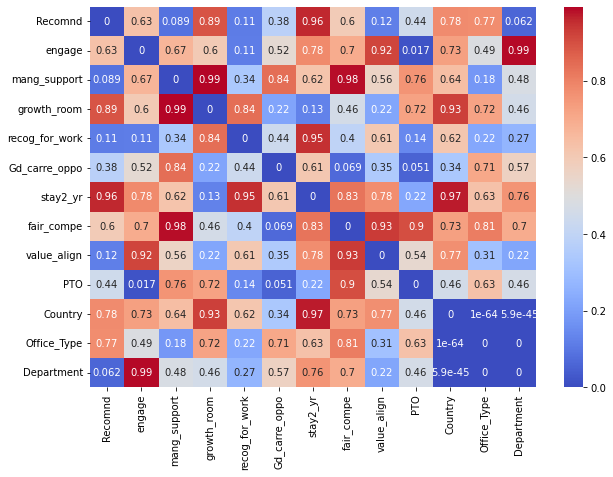

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame called 'df' with the columns you mentioned
columns = ['Recomnd', 'engage', 'mang_support', 'growth_room',
           'recog_for_work', 'Gd_carre_oppo', 'stay2_yr', 'fair_compe',
           'value_align', 'PTO', 'Country',
           'Office_Type', 'Department']

# Create an empty matrix to store the p-values
p_values_matrix = np.zeros((len(columns), len(columns)))

# Perform chi-square test for each combination of categorical variables
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        # Create a contingency table
        contingency_table = pd.crosstab(emp[columns[i]], emp[columns[j]])
        
        # Perform chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Store the p-value in the matrix
        p_values_matrix[i, j] = p
        p_values_matrix[j, i] = p

# Create a DataFrame from the p-values matrix
p_values_df = pd.DataFrame(p_values_matrix, index=columns, columns=columns)

#Set the width and height of the plot
f = plt.subplots(figsize=(10, 7))
# Create a heatmap
sns.heatmap(p_values_df, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

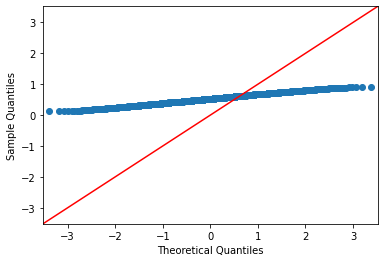

In [45]:
import statsmodels.api as sm
X=emp['comp_score']
fig = sm.qqplot(X, line='45')
plt.show()

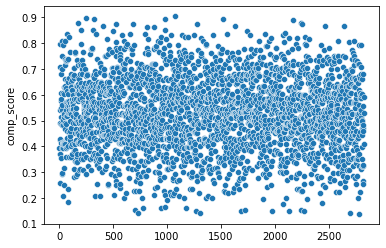

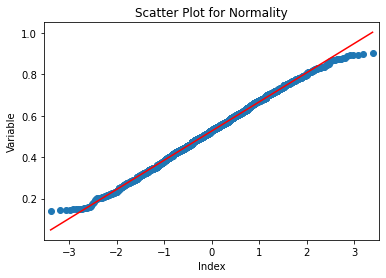

In [46]:
# Assuming 'data' is your DataFrame and 'variable' is the column you want to check for normality
variable = 'comp_score'  # Replace with the actual column name

# Create a scatter plot
sns.scatterplot(data=emp, x=emp.index, y=variable)

# Add a theoretical normal distribution line
sm.qqplot(emp[variable], line='s')

plt.xlabel('Index')
plt.ylabel('Variable')
plt.title('Scatter Plot for Normality')
plt.show()

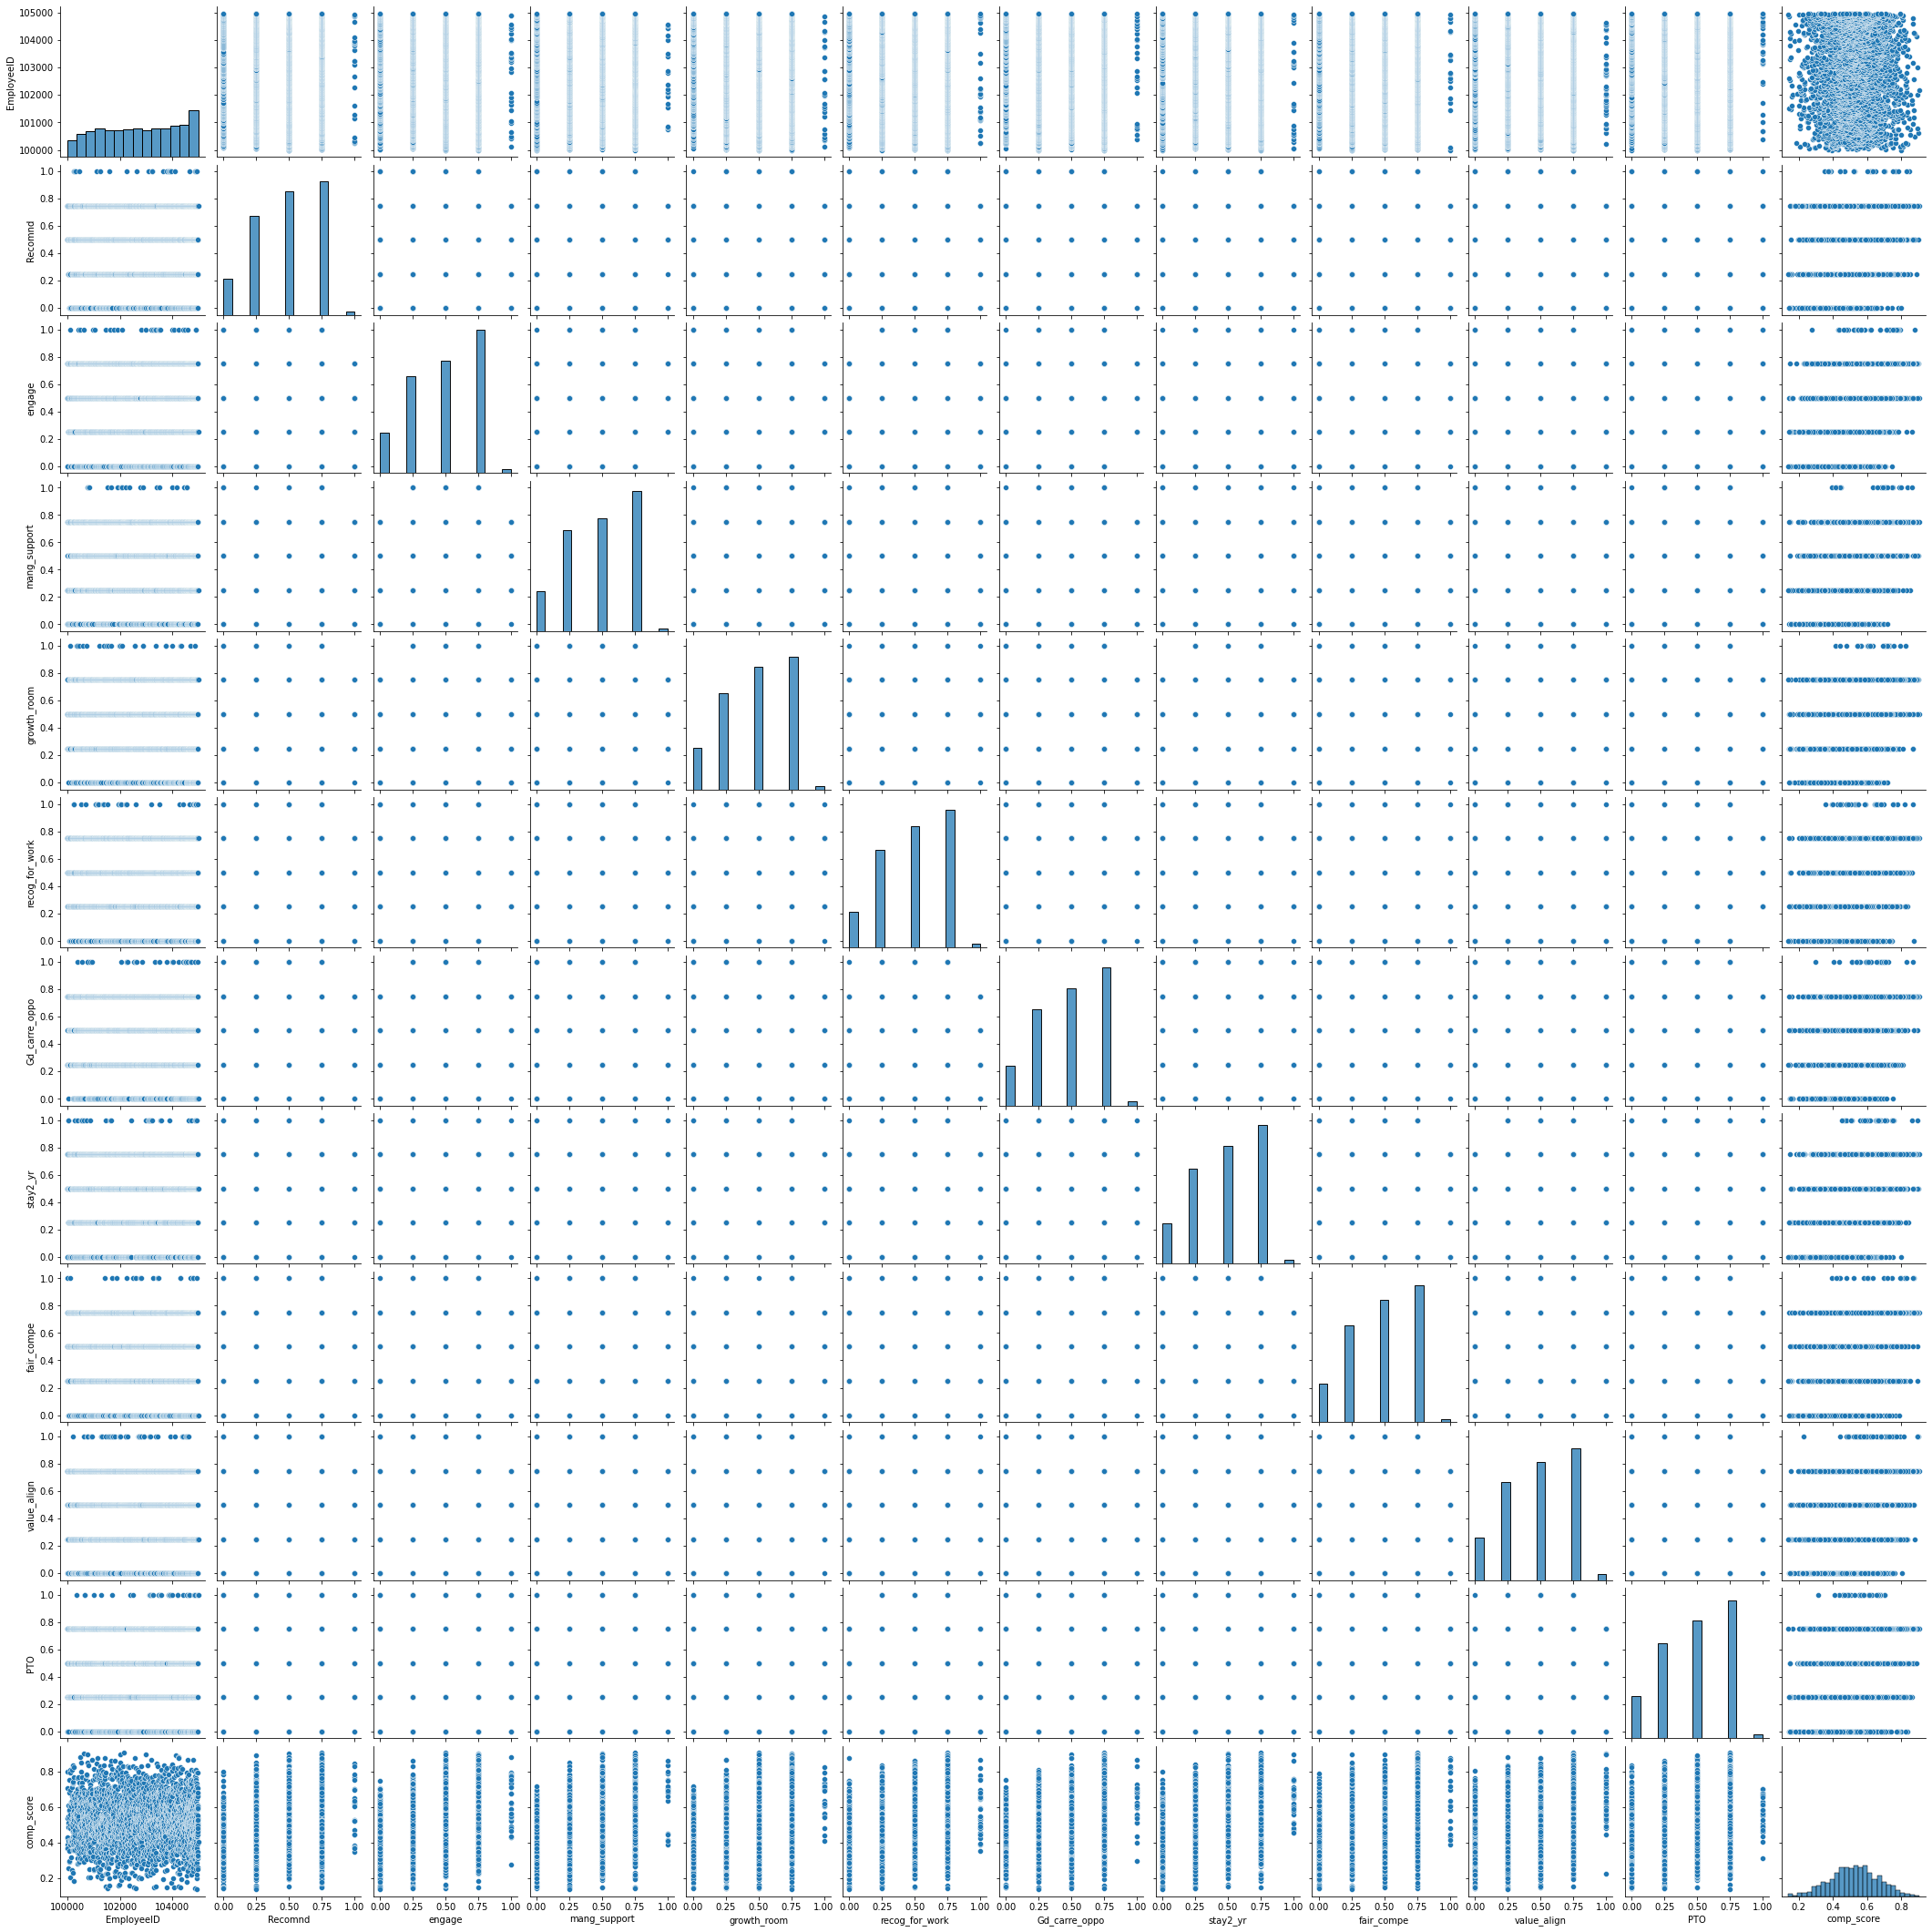

In [47]:
sns.pairplot(emp)

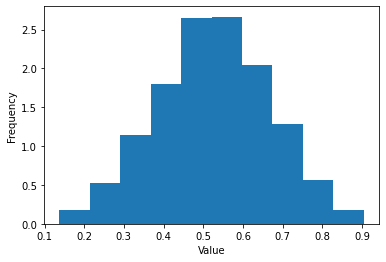

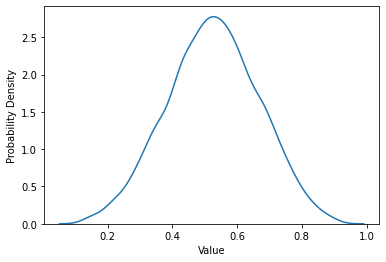

In [48]:
data=emp['comp_score']
# create a histogram
plt.hist(data,bins=10,density=True)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# create a density plot
sns.kdeplot(data)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


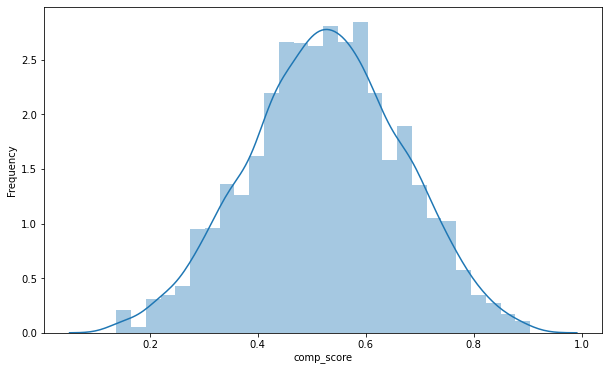

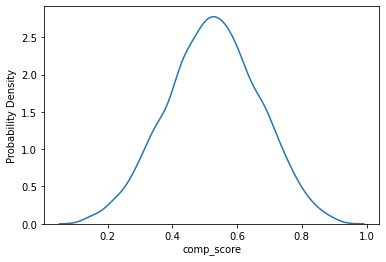

In [49]:


data=emp['comp_score']
variable='comp_score'
# create a histogram
plt.figure(figsize=(10, 6))
sns.distplot(emp[variable], kde=True, hist=True, rug=False)
plt.xlabel('comp_score')
plt.ylabel('Frequency')
plt.show()

# create a density plot
sns.kdeplot(data)
plt.xlabel('comp_score')
plt.ylabel('Probability Density')
plt.show()

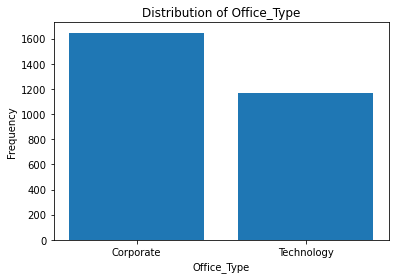

Corporate     1646
Technology    1166
Name: Office_Type, dtype: int64


In [50]:
# Calculate the frequency or proportion of each category
Office_Type_counts = emp['Office_Type'].value_counts()

# Create a bar plot
plt.bar(Office_Type_counts.index, Office_Type_counts.values)

# Customize the plot
plt.xlabel('Office_Type')
plt.ylabel('Frequency')
plt.title('Distribution of Office_Type')

# Display the plot
plt.show()
print(Office_Type_counts)

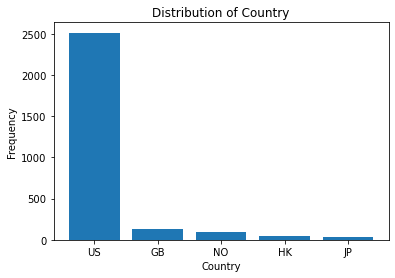

US    2514
GB     132
NO      91
HK      42
JP      33
Name: Country, dtype: int64


In [51]:
# Calculate the frequency or proportion of each category
Country_counts = emp['Country'].value_counts()

# Create a bar plot
plt.bar(Country_counts.index, Country_counts.values)

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Distribution of Country')

# Display the plot
plt.show()
print(Country_counts)

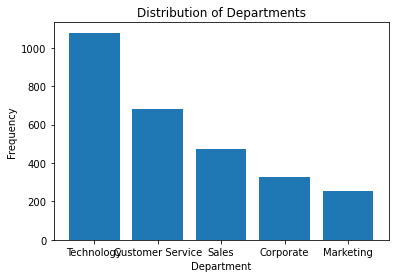

Technology          1079
Customer Service     684
Sales                471
Corporate            325
Marketing            253
Name: Department, dtype: int64


In [52]:
# Calculate the frequency or proportion of each category
department_counts = emp['Department'].value_counts()

# Create a bar plot
plt.bar(department_counts.index, department_counts.values)

# Customize the plot
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.title('Distribution of Departments')

# Display the plot
plt.show()
print(department_counts)

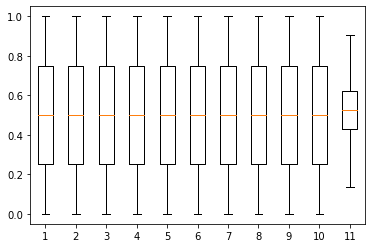

<Figure size 720x504 with 0 Axes>

In [53]:
a=plt.boxplot(emp.iloc[:,1:12])
plt.figure(figsize=(10,7))
plt.show()

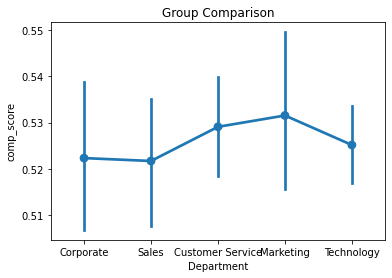

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pointplot(x='Department', y='comp_score', data=emp)
plt.xlabel('Department')
plt.ylabel('comp_score')
plt.title('Group Comparison')
plt.show()

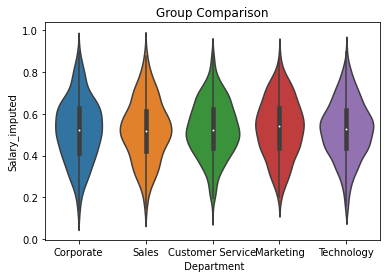

In [55]:
# Assuming 'data' is your DataFrame, 'Department' is the categorical variable for grouping,
# and 'Salary_imputed' is the numerical variable to compare
sns.violinplot(x='Department', y='comp_score', data=emp)
plt.xlabel(' Department')
plt.ylabel('Salary_imputed')
plt.title('Group Comparison')
plt.show()

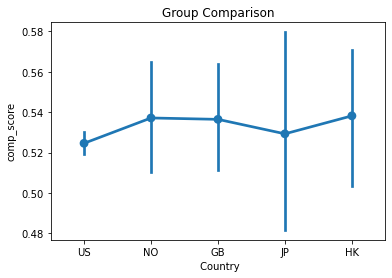

In [56]:
# Assuming 'emp' is your DataFrame, 'Country' is the categorical variable for grouping,
# and 'Salary_imputed' is the numerical variable to compare
sns.pointplot(x='Country', y='comp_score', data=emp)
plt.xlabel(' Country')
plt.ylabel('comp_score')
plt.title('Group Comparison')
plt.show()

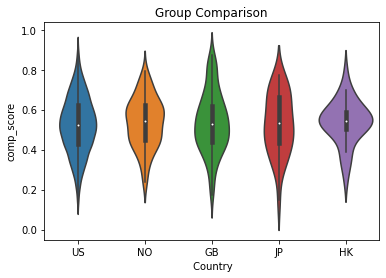

In [57]:
# Assuming 'emp' is your DataFrame, 'Country' is the categorical variable for grouping,
# and 'Salary_imputed' is the numerical variable to compare
sns.violinplot(x='Country', y='comp_score', data=emp)
plt.xlabel(' Country')
plt.ylabel('comp_score')
plt.title('Group Comparison')
plt.show()

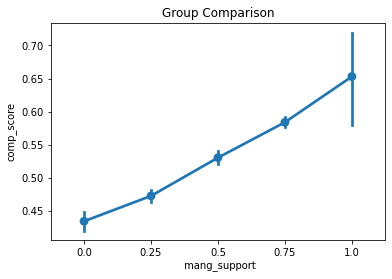

In [58]:
# Assuming 'emp' is your DataFrame, 'mang_support' is the categorical variable for grouping,
# and 'comp_score' is the numerical variable to compare
sns.pointplot(x='mang_support', y='comp_score', data=emp)
plt.xlabel(' mang_support')
plt.ylabel('comp_score')
plt.title('Group Comparison')
plt.show()

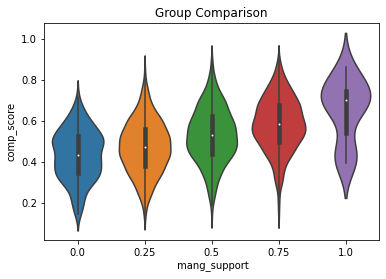

In [59]:
# Assuming 'emp' is your DataFrame, 'mang_support' is the categorical variable for grouping,
# and 'comp_score' is the numerical variable to compare
sns.violinplot(x='mang_support', y='comp_score', data=emp)
plt.xlabel(' mang_support')
plt.ylabel('comp_score')
plt.title('Group Comparison')
plt.show()

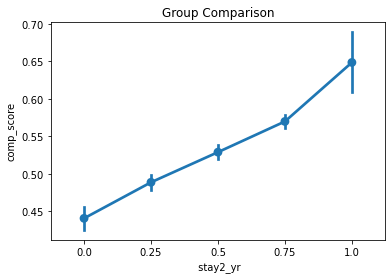

In [60]:
# Assuming 'emp' is your DataFrame, 'stay2_year' is the categorical variable for grouping,
# and 'comp_score' is the numerical variable to compare
sns.pointplot(x='stay2_yr', y='comp_score', data=emp)
plt.xlabel(' stay2_yr')
plt.ylabel('comp_score')
plt.title('Group Comparison')
plt.show()

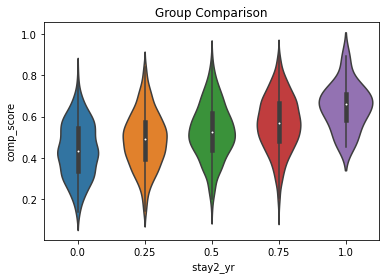

In [61]:
# Assuming 'emp' is your DataFrame, 'stay2_year' is the categorical variable for grouping,
# and 'comp_score' is the numerical variable to compare
sns.violinplot(x='stay2_yr', y='comp_score', data=emp)
plt.xlabel(' stay2_yr')
plt.ylabel('comp_score')
plt.title('Group Comparison')
plt.show()

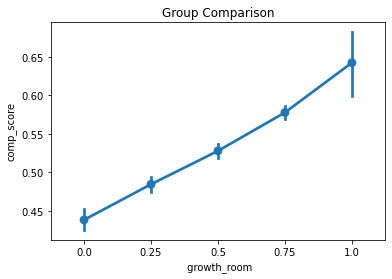

In [62]:
# Assuming 'emp' is your DataFrame, 'growth_room' is the categorical variable for grouping,
# and 'comp_score' is the numerical variable to compare
sns.pointplot(x='growth_room', y='comp_score', data=emp)
plt.xlabel(' growth_room')
plt.ylabel('comp_score')
plt.title('Group Comparison')
plt.show()

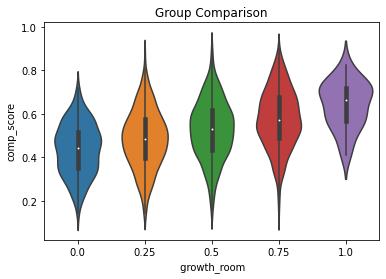

In [63]:
# Assuming 'emp' is your DataFrame, 'growth_room' is the categorical variable for grouping,
# and 'comp_score' is the numerical variable to compare
sns.violinplot(x='growth_room', y='comp_score', data=emp)
plt.xlabel(' growth_room')
plt.ylabel('comp_score')
plt.title('Group Comparison')
plt.show()

# Testing of Hypothesis

# Anova

The determination of the required R-square value depends on the specific context and goals of your analysis. In the case of an ANOVA test, R-square is not typically used as a measure of goodness of fit or model performance. Instead, ANOVA focuses on assessing the statistical significance of the differences between groups.

The ANOVA test examines whether there are statistically significant differences in the mean composite scores across different departments. The p-value associated with the ANOVA test indicates whether there is evidence to reject the null hypothesis of equal means. A small p-value (typically less than 0.05) suggests that there are significant differences between at least two departments.

It's important to note that R-square is commonly used in regression analysis to measure the proportion of variance explained by the model. However, ANOVA is not a regression analysis, and R-square is not directly applicable in this context

In [64]:
from scipy.stats import f_oneway
data=emp.copy()

# Assume you have a DataFrame called 'data' with the relevant columns 'department' and 'composite score'
# Extract the data for each department
dept1 = data[data['Department'] == 'Corporate']['comp_score']
dept2 = data[data['Department'] == 'Sales']['comp_score']
dept3 = data[data['Department'] == 'Customer Service']['comp_score']
dept4 = data[data['Department'] == 'Technology']['comp_score']
dept5 = data[data['Department'] == 'Marketing']['comp_score']

# Perform the ANOVA test
f_statistic, p_value = f_oneway(dept1, dept2, dept3, dept4, dept5)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 0.34917857053366447
p-value: 0.8447398403474254


As above result p-value > 0.05, so we accept Ho in this test and 
we can conclude that All means are equal for each department. So composite score are not varrying with different department 

In [65]:
# Assume you have a DataFrame called 'data' with the relevant columns 'department' and 'composite score'
# Extract the data for each department
country1 = data[data['Country'] == 'US']['comp_score']
country2 = data[data['Country'] == 'GB']['comp_score']
country3 = data[data['Country'] == 'HK']['comp_score']
country4 = data[data['Country'] == 'NO']['comp_score']
country5 = data[data['Country'] == 'JP']['comp_score']

# Perform the ANOVA test
f_statistic, p_value = f_oneway(country1, country2, country3, country4, country5)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 0.4673853235279981
p-value: 0.7597298822919724


In [66]:
data

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,comp_score,Country,Office_Type,Department,Job_title,level
0,100001.0,0.50,0.50,0.00,0.50,0.25,0.25,0.75,0.25,0.75,0.50,0.391534,US,Corporate,Corporate,CEO,CSuite
1,100002.0,0.50,0.75,0.75,0.75,0.75,0.75,0.00,1.00,0.75,0.00,0.798942,US,Corporate,Corporate,HR Manager,Manager
2,100009.0,0.50,0.75,0.50,0.50,0.75,0.25,0.00,0.50,0.50,0.75,0.539683,US,Corporate,Sales,"Director, Sales",Director
3,100014.0,0.75,0.00,0.25,0.50,0.50,0.50,0.75,0.25,0.50,0.25,0.423280,US,Corporate,Corporate,AP Specialist,Individual Contributor
4,100018.0,0.75,0.00,0.00,0.50,0.50,0.75,0.50,0.25,0.25,0.50,0.370370,US,Corporate,Customer Service,"SVP, Customer Service",SVP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,104964.0,0.50,0.50,0.75,0.00,0.00,0.25,0.75,0.00,0.50,0.50,0.328042,US,Corporate,Marketing,Chief Marketing Officer,CSuite
2823,104965.0,0.75,0.75,0.25,0.50,0.00,0.75,0.00,0.75,0.00,0.75,0.481481,US,Technology,Technology,Software Engineer,Individual Contributor
2824,104966.0,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.50,0.75,0.50,0.592593,US,Corporate,Sales,Sales Team Lead,Senior
2825,104967.0,0.50,0.00,0.75,0.50,0.50,0.75,0.25,0.50,0.50,0.50,0.529101,US,Technology,Technology,Senior Software Engineer,Senior


As above result p-value > 0.05, so we accept Ho in this test and
we can conclude that All means are  equal i.e not differ significantly for each department. So composite score are  not varrying with different countries

# Chi- Square

In [67]:
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named 'data' with 'manager_support' and 'department' columns

# Create a contingency table
contingency_table = pd.crosstab(data['mang_support'], data['Department'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 15.660001812160797
P-value: 0.4769314815653599


# Chi_Square test for Independence

In [68]:
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame called 'df' with the columns you mentioned
columns = ['Recomnd', 'engage', 'mang_support', 'growth_room',
           'recog_for_work', 'Gd_carre_oppo', 'stay2_yr', 'fair_compe',
           'value_align', 'PTO', 'Country',
           'Office_Type', 'Department']

# Perform chi-square test for each combination of categorical variables
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        # Create a contingency table
        contingency_table = pd.crosstab(df[columns[i]], df[columns[j]])
        
        # Perform chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Print the results
        print(f"Chi-square test between {columns[i]} and {columns[j]}:")
        print(f"Chi-square statistic: {chi2}")
        print(f"P-value: {p}")
        print("")

Chi-square test between Recomnd and engage:
Chi-square statistic: 13.547807410520916
P-value: 0.6323611792079391

Chi-square test between Recomnd and mang_support:
Chi-square statistic: 24.041943535205807
P-value: 0.08859239822889743

Chi-square test between Recomnd and growth_room:
Chi-square statistic: 9.513973825213657
P-value: 0.8907487128346852

Chi-square test between Recomnd and recog_for_work:
Chi-square statistic: 23.05821248811982
P-value: 0.11218718611013116

Chi-square test between Recomnd and Gd_carre_oppo:
Chi-square statistic: 17.135116572064437
P-value: 0.3769063086056322

Chi-square test between Recomnd and stay2_yr:
Chi-square statistic: 7.511428618000264
P-value: 0.9620999027404671

Chi-square test between Recomnd and fair_compe:
Chi-square statistic: 14.04155825976056
P-value: 0.5956177191935144

Chi-square test between Recomnd and value_align:
Chi-square statistic: 22.776490354335618
P-value: 0.11984133706443313

Chi-square test between Recomnd and PTO:
Chi-square 

In [69]:
emp

,EmployeeID,Recomnd,engage,mang_support,growth_room,recog_for_work,Gd_carre_oppo,stay2_yr,fair_compe,value_align,PTO,comp_score,Country,Office_Type,Department,Job_title,level
0,100001.0,0.50,0.50,0.00,0.50,0.25,0.25,0.75,0.25,0.75,0.50,0.391534,US,Corporate,Corporate,CEO,CSuite
1,100002.0,0.50,0.75,0.75,0.75,0.75,0.75,0.00,1.00,0.75,0.00,0.798942,US,Corporate,Corporate,HR Manager,Manager
2,100009.0,0.50,0.75,0.50,0.50,0.75,0.25,0.00,0.50,0.50,0.75,0.539683,US,Corporate,Sales,"Director, Sales",Director
3,100014.0,0.75,0.00,0.25,0.50,0.50,0.50,0.75,0.25,0.50,0.25,0.423280,US,Corporate,Corporate,AP Specialist,Individual Contributor
4,100018.0,0.75,0.00,0.00,0.50,0.50,0.75,0.50,0.25,0.25,0.50,0.370370,US,Corporate,Customer Service,"SVP, Customer Service",SVP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,104964.0,0.50,0.50,0.75,0.00,0.00,0.25,0.75,0.00,0.50,0.50,0.328042,US,Corporate,Marketing,Chief Marketing Officer,CSuite
2823,104965.0,0.75,0.75,0.25,0.50,0.00,0.75,0.00,0.75,0.00,0.75,0.481481,US,Technology,Technology,Software Engineer,Individual Contributor
2824,104966.0,0.50,0.50,0.50,0.25,0.75,0.50,0.50,0.50,0.75,0.50,0.592593,US,Corporate,Sales,Sales Team Lead,Senior
2825,104967.0,0.50,0.00,0.75,0.50,0.50,0.75,0.25,0.50,0.50,0.50,0.529101,US,Technology,Technology,Senior Software Engineer,Senior


 it suggests that there is no significant association or dependency between the categorical variables being compared. In other words, there is no evidence to reject the null hypothesis that the variables are independent.

Therefore, based on the given p-values, we can conclude that there is no significant multicollinearity present between the categorical variables in the dataset.

# Chi-Square test for homogeniety

In [70]:
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame called 'df' with the columns you mentioned
columns = ['Recomnd', 'engage', 'mang_support', 'growth_room',
           'recog_for_work', 'Gd_carre_oppo', 'stay2_yr', 'fair_compe',
           'value_align', 'PTO', 'Country',
           'Office_Type', 'Department']

# Perform chi-square test for each combination of categorical variables
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        # Create a contingency table
        contingency_table = pd.crosstab(df[columns[i]], df[columns[j]])
        
        # Perform chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
    

     # Print the results
        print(f"Chi-square test between {columns[i]} and {columns[j]}:")
        print(f"Chi-square statistic: {chi2}")
        print(f"P-value: {p}")
        print("")
        print("Degrees of Freedom:", dof)
        print("Expected Frequencies:\n", expected)
        print("-------------------------------------")


Chi-square test between Recomnd and engage:
Chi-square statistic: 13.547807410520916
P-value: 0.6323611792079391

Degrees of Freedom: 16
Expected Frequencies:
 [[2.62300853e+01 6.25135135e+01 7.28410384e+01 9.28563300e+01
  2.55903272e+00]
 [7.19541252e+01 1.71486486e+02 1.99816856e+02 2.54722617e+02
  7.01991465e+00]
 [8.97130156e+01 2.13810811e+02 2.49133357e+02 3.17590327e+02
  8.75248933e+00]
 [9.67553343e+01 2.30594595e+02 2.68689900e+02 3.42520626e+02
  9.43954481e+00]
 [2.34743954e+00 5.59459459e+00 6.51884780e+00 8.31009957e+00
  2.29018492e-01]]
-------------------------------------
Chi-square test between Recomnd and mang_support:
Chi-square statistic: 24.041943535205807
P-value: 0.08859239822889743

Degrees of Freedom: 16
Expected Frequencies:
 [[2.58645092e+01 6.52553343e+01 7.33894026e+01 9.07542674e+01
  1.73648649e+00]
 [7.09512802e+01 1.79007824e+02 2.01321124e+02 2.48956259e+02
  4.76351351e+00]
 [8.84626600e+01 2.23188478e+02 2.51008890e+02 3.10400782e+02
  5.93918919

In [71]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


# ________________________Confidence Interval_______________________________________________

In [72]:
import numpy as np
from scipy.stats import t

# Confidence interval for the mean of a numerical variable
confidence_level = 0.95
variable_mean = np.mean(emp['comp_score'])
variable_std = np.std(emp['comp_score'])
sample_size = len(emp['comp_score'])
margin_of_error = t.ppf((1 + confidence_level) / 2, df=sample_size-1) * variable_std / np.sqrt(sample_size)
confidence_interval = (variable_mean - margin_of_error, variable_mean + margin_of_error)
print("Confidence interval for the mean of the comp_score:")
print(confidence_interval)

Confidence interval for the mean of the comp_score:
(0.5205727806831821, 0.5310051129999751)


# Contingency Table

In [73]:
# Assuming you have a DataFrame called 'df' with the columns 'Variable1' and 'Variable2'
contingency_table = pd.crosstab(emp['mang_support'], emp['Department'])

# Calculate the total count
total_count = contingency_table.sum().sum()

# Calculate the probabilities by dividing each cell count by the total count
probabilities = contingency_table / total_count

# Display the contingency table with probabilities
print(probabilities)

Department    Corporate  Customer Service  Marketing     Sales  Technology
mang_support                                                              
0.00           0.012447          0.022760   0.007468  0.021337    0.036629
0.25           0.028094          0.055477   0.022048  0.045875    0.102418
0.50           0.032006          0.070057   0.025960  0.044452    0.113087
0.75           0.042674          0.092817   0.033428  0.055121    0.129090
1.00           0.000356          0.002134   0.001067  0.000711    0.002489


In [74]:
# Assuming you have a DataFrame called 'df' with the columns 'Variable1' and 'Variable2'
contingency_table = pd.crosstab(emp['mang_support'], emp['growth_room'])

# Calculate the total count
total_count = contingency_table.sum().sum()

# Calculate the probabilities by dividing each cell count by the total count
probabilities = contingency_table / total_count

# Display the contingency table with probabilities
print(probabilities)

growth_room       0.00      0.25      0.50      0.75      1.00
mang_support                                                  
0.00          0.009246  0.025605  0.031650  0.033073  0.001067
0.25          0.029161  0.062945  0.078236  0.080725  0.002845
0.50          0.030939  0.067923  0.089260  0.095306  0.002134
0.75          0.034495  0.083215  0.109175  0.123044  0.003201
1.00          0.000356  0.001778  0.001778  0.002845  0.000000


In [75]:
# Assuming you have a DataFrame called 'df' with the columns 'Variable1' and 'Variable2'
contingency_table = pd.crosstab(emp['growth_room'], emp['Department'])

# Calculate the total count
total_count = contingency_table.sum().sum()

# Calculate the probabilities by dividing each cell count by the total count
probabilities = contingency_table / total_count

# Display the contingency table with probabilities
print(probabilities)

Department   Corporate  Customer Service  Marketing     Sales  Technology
growth_room                                                              
0.00          0.013158          0.027383   0.010313  0.015647    0.037696
0.25          0.029872          0.056188   0.017070  0.043030    0.095306
0.50          0.030583          0.078236   0.026316  0.051209    0.123755
0.75          0.040541          0.080370   0.035562  0.055477    0.123044
1.00          0.001422          0.001067   0.000711  0.002134    0.003912


In [76]:
# Assuming you have a DataFrame called 'df' with the columns 'Variable1' and 'Variable2'
contingency_table = pd.crosstab(emp['growth_room'], emp['Gd_carre_oppo'])

# Calculate the total count
total_count = contingency_table.sum().sum()

# Calculate the probabilities by dividing each cell count by the total count
probabilities = contingency_table / total_count

# Display the contingency table with probabilities
print(probabilities)

Gd_carre_oppo      0.00      0.25      0.50      0.75      1.00
growth_room                                                    
0.00           0.007824  0.025249  0.028094  0.041607  0.001422
0.25           0.024538  0.060455  0.072546  0.080370  0.003556
0.50           0.033073  0.075747  0.089616  0.109175  0.002489
0.75           0.034139  0.081081  0.103841  0.113087  0.002845
1.00           0.001422  0.001067  0.001067  0.005690  0.000000


# Modeling

Spliting data

In [150]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
df=emp.copy()

# Load your preprocessed data and target variable
# Replace 'X' with your input features (independent variables) and 'y' with your target variable
columns_to_drop=[ 'EmployeeID','comp_score', 'Country', 'Office_Type','Department', 'Job_title', 'level']
X = df.drop(columns_to_drop, axis=1)
y = df['comp_score']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Generalized Linear model

In [78]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score




# Fit the GLM on the training data
model = sm.GLM(y_train, X_train, family=sm.families.Gaussian())
result = model.fit()

# Make predictions on the testing data
y_pred = result.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

#Evaluate the model accuracy
R_squared=r2_score(y_test,y_pred)
print("R square :",R_squared)

# Print the model summary
print(result.summary())


# Get the estimated coefficients
coefficients = result.params
print("Estimated Coefficients:")
print(coefficients)

# Get the p-values
p_values = result.pvalues
print("P-values:")
print(p_values)

# Get the confidence intervals
confidence_intervals = result.conf_int()
print("Confidence Intervals:")
print(confidence_intervals)

Mean Squared Error: 0.0026534158893946917
R square : 0.8657800695435991
                 Generalized Linear Model Regression Results                  
Dep. Variable:             comp_score   No. Observations:                 1968
Model:                            GLM   Df Residuals:                     1958
Model Family:                Gaussian   Df Model:                            9
Link Function:               Identity   Scale:                       0.0026862
Method:                          IRLS   Log-Likelihood:                 3037.4
Date:                Fri, 26 May 2023   Deviance:                       5.2597
Time:                        07:56:52   Pearson chi2:                     5.26
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9984
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

Coefficient Estimates: The coefficient estimates represent the estimated effect of each predictor variable on the response variable. A positive coefficient indicates a positive association with the response variable, while a negative coefficient indicates a negative association. The magnitude of the coefficient indicates the strength of the association.

p-values: The p-values associated with each coefficient provide a measure of statistical significance. A p-value less than the chosen significance level (e.g., 0.05) suggests that the corresponding predictor variable has a significant impact on the response variable. On the other hand, a p-value greater than the significance level indicates that the association may be due to chance.

Confidence Intervals: The confidence intervals provide a range of plausible values for the coefficient. If the confidence interval does not include zero, it suggests that the corresponding predictor variable has a statistically significant effect on the response variable.

Goodness-of-Fit: Assessing the goodness-of-fit measures, such as the deviance or AIC (Akaike Information Criterion), helps evaluate how well the GLM model fits the data. Lower values of these measures indicate a better fit

____________________________________________________Conclusion_____________________________________________________________

In the provided output, we have the coefficients, p-values, and confidence intervals for each predictor variable in the generalized linear model. Here's the interpretation:

Coefficients: The coefficients represent the estimated effect of each predictor variable on the response variable (comp_score). For example, the coefficient for 'Recomnd' is 0.1688, which suggests that for a one-unit increase in the 'Recomnd' variable, the 'comp_score' is expected to increase by 0.1688 units, holding all other variables constant. Similarly, the coefficients for other variables indicate the expected change in 'comp_score' associated with a one-unit increase in each respective variable.

P-values: The p-values indicate the statistical significance of the coefficients. A p-value less than the chosen significance level (usually 0.05) suggests that the corresponding predictor variable has a significant impact on the response variable. In this case, all predictor variables have p-values of 0.000, indicating that they are statistically significant predictors of 'comp_score'.

Confidence Intervals: The confidence intervals provide a range of plausible values for the coefficients. For example, the confidence interval for 'Recomnd' is (0.166749, 0.170912), indicating that we can be 95% confident that the true coefficient value for 'Recomnd' lies within this range. Similarly, the confidence intervals for other variables provide a range of plausible values for their respective coefficients.

In summary, based on the provided output, we can conclude that all the predictor variables (categorical and numerical) have statistically significant effects on the response variable 'comp_score'. The coefficients give an estimate of the magnitude and direction of the effect, while the p-values and confidence intervals provide the statistical significance and uncertainty associated with the estimated coefficients

# Linear Regressiom

Mean Squared Error (MSE): 7.861445225127197e-32
R-squared: 1.0


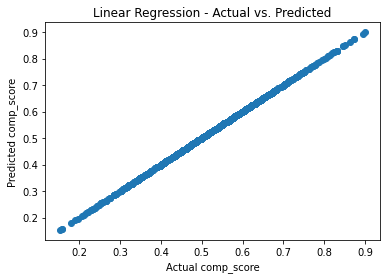

In [121]:
from sklearn.linear_model import LinearRegression




# Step 1: Fit a linear regression model
# Assuming you have already preprocessed the data and handled missing values, encoding, etc.

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Step 2: Evaluate the linear regression model

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R-squared)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)


# Step 3: Visualize the linear regression results (optional)

# Plot the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual comp_score')
plt.ylabel('Predicted comp_score')
plt.title('Linear Regression - Actual vs. Predicted')
plt.show()

In [122]:
#overfitting check by using train and test data

# Predict the response variable for the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the R-squared score for training and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("R-squared score on the training set:", r2_train)
print("R-squared score on the test set:", r2_test)


R-squared score on the training set: 1.0
R-squared score on the test set: 1.0


In [123]:
 # data leakage check 
# Iterate over each categorical predictor
leaking_predictors = []
for col in X.select_dtypes(include=['string']):  # Adjust the data type selection as per your categorical variables
    # Calculate the mean or distribution of the response variable within each category
    category_means = X.groupby(col)[y.name].mean()
    category_distributions = X.groupby(col)[y.name].apply(lambda x: np.histogram(x, bins='auto')[0])

    # Check if any category means or distributions are significantly different
    if category_means.std() == 0 or category_distributions.std() == 0:
        leaking_predictors.append(col)

# Print the predictors that show no or very low variance in category means or distributions
print("Potential predictors with no or very low variance in category means or distributions:")
print(leaking_predictors)

#using correlation

# Iterate over each encoded categorical predictor
leaking_predictors = []
for col in X.columns:
    # Calculate the correlation between the encoded predictor and the response variable
    correlation = np.corrcoef(X[col], y)[0, 1]

    # Check if the correlation is unusually high
    if abs(correlation) > 0.8:  # Adjust the threshold as per your requirement
        leaking_predictors.append(col)

# Print the predictors that show a high correlation with the response variable
print("Potential predictors with a high correlation with the response variable:")
print(leaking_predictors)

Potential predictors with no or very low variance in category means or distributions:
[]
Potential predictors with a high correlation with the response variable:
[]


In [124]:
#cross validation

from sklearn.model_selection import cross_val_score


# Create a regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive
mse_scores = -cv_scores

# Print the cross-validation scores
print("Cross-Validation R-squared scores:", cv_scores)
print("Mean R-squared:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())
# Calculate the average mean squared error
print("Average MSE:",mse_scores.mean())
print("Cross-Validation Mean Squared Error (MSE) Scores:")
print(mse_scores)



Cross-Validation R-squared scores: [-6.44649460e-32 -2.57465704e-32 -6.72224943e-32 -1.05406626e-31
 -6.14049522e-32]
Mean R-squared: -6.484911770072758e-32
Standard Deviation: 2.5264850821834433e-32
Average MSE: 6.484911770072758e-32
Cross-Validation Mean Squared Error (MSE) Scores:
[6.44649460e-32 2.57465704e-32 6.72224943e-32 1.05406626e-31
 6.14049522e-32]


In [125]:
#Statistical significance

import statsmodels.api as sm

# Assuming you have already fitted the linear regression model and named it 'model'
# Add a constant term to the X variables
x = sm.add_constant(X)

# Fit the ordinary least squares (OLS) model
ols_model = sm.OLS(y, x).fit()

# Get the p-values of the coefficients
p_values = ols_model.pvalues

# Print the p-values
print(p_values)

const             0.0
Recomnd           0.0
engage            0.0
mang_support      0.0
growth_room       0.0
recog_for_work    0.0
Gd_carre_oppo     0.0
stay2_yr          0.0
fair_compe        0.0
value_align       0.0
PTO               0.0
dtype: float64


In [126]:
y_pred=ols_model.predict(x)
r2=r2_score(y,y_pred)
r2

1.0

In [127]:
# significant features

# Assuming you have already fitted the linear regression model and named it 'model'

# Get the coefficients of the linear regression model
coefficients = model.coef_

# Get the corresponding feature names from the X DataFrame
feature_names = X.columns

# Create a DataFrame to store the feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the feature importance by absolute coefficient values in descending order
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Print the feature importance
print(feature_importance)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

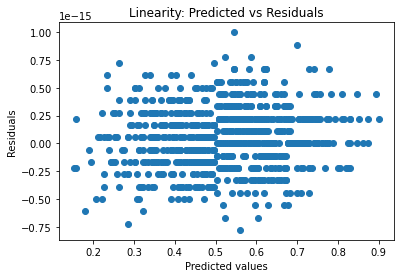

Durbin-Watson test statistic: 1.987228311350548


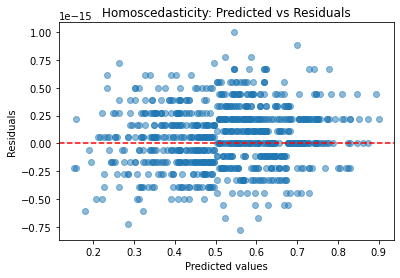

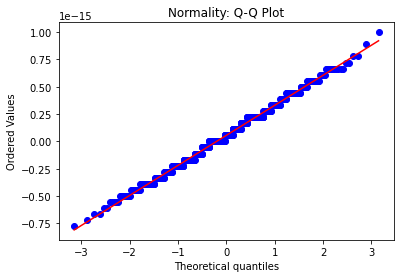

In [132]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have already fitted the linear regression model and named it 'model'
# Add a constant term to the X variables
#X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) model
#ols_model = sm.OLS(y, X).fit()

# Initialize the linear regression model
model = LinearRegression()


# Fit the model on the training data
model.fit(X_train, y_train)

# Obtain the predicted values (y_pred) and residuals (residuals)
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Linearity assumption: Check for linearity between the predicted values and residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linearity: Predicted vs Residuals")
plt.show()

# Independence assumption: Check for autocorrelation using Durbin-Watson test
durbin_watson = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson test statistic:", durbin_watson)

# Homoscedasticity assumption: Check for constant variance using a residual plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity: Predicted vs Residuals")
plt.show()

# Normality assumption: Check for normality of residuals using a Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normality: Q-Q Plot")
plt.show()

#polynomial regression

In [133]:
from sklearn.preprocessing import PolynomialFeatures




# Create polynomial features
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 1.0


# Decision tree

Mean Squared Error (MSE): 0.008552189850796817


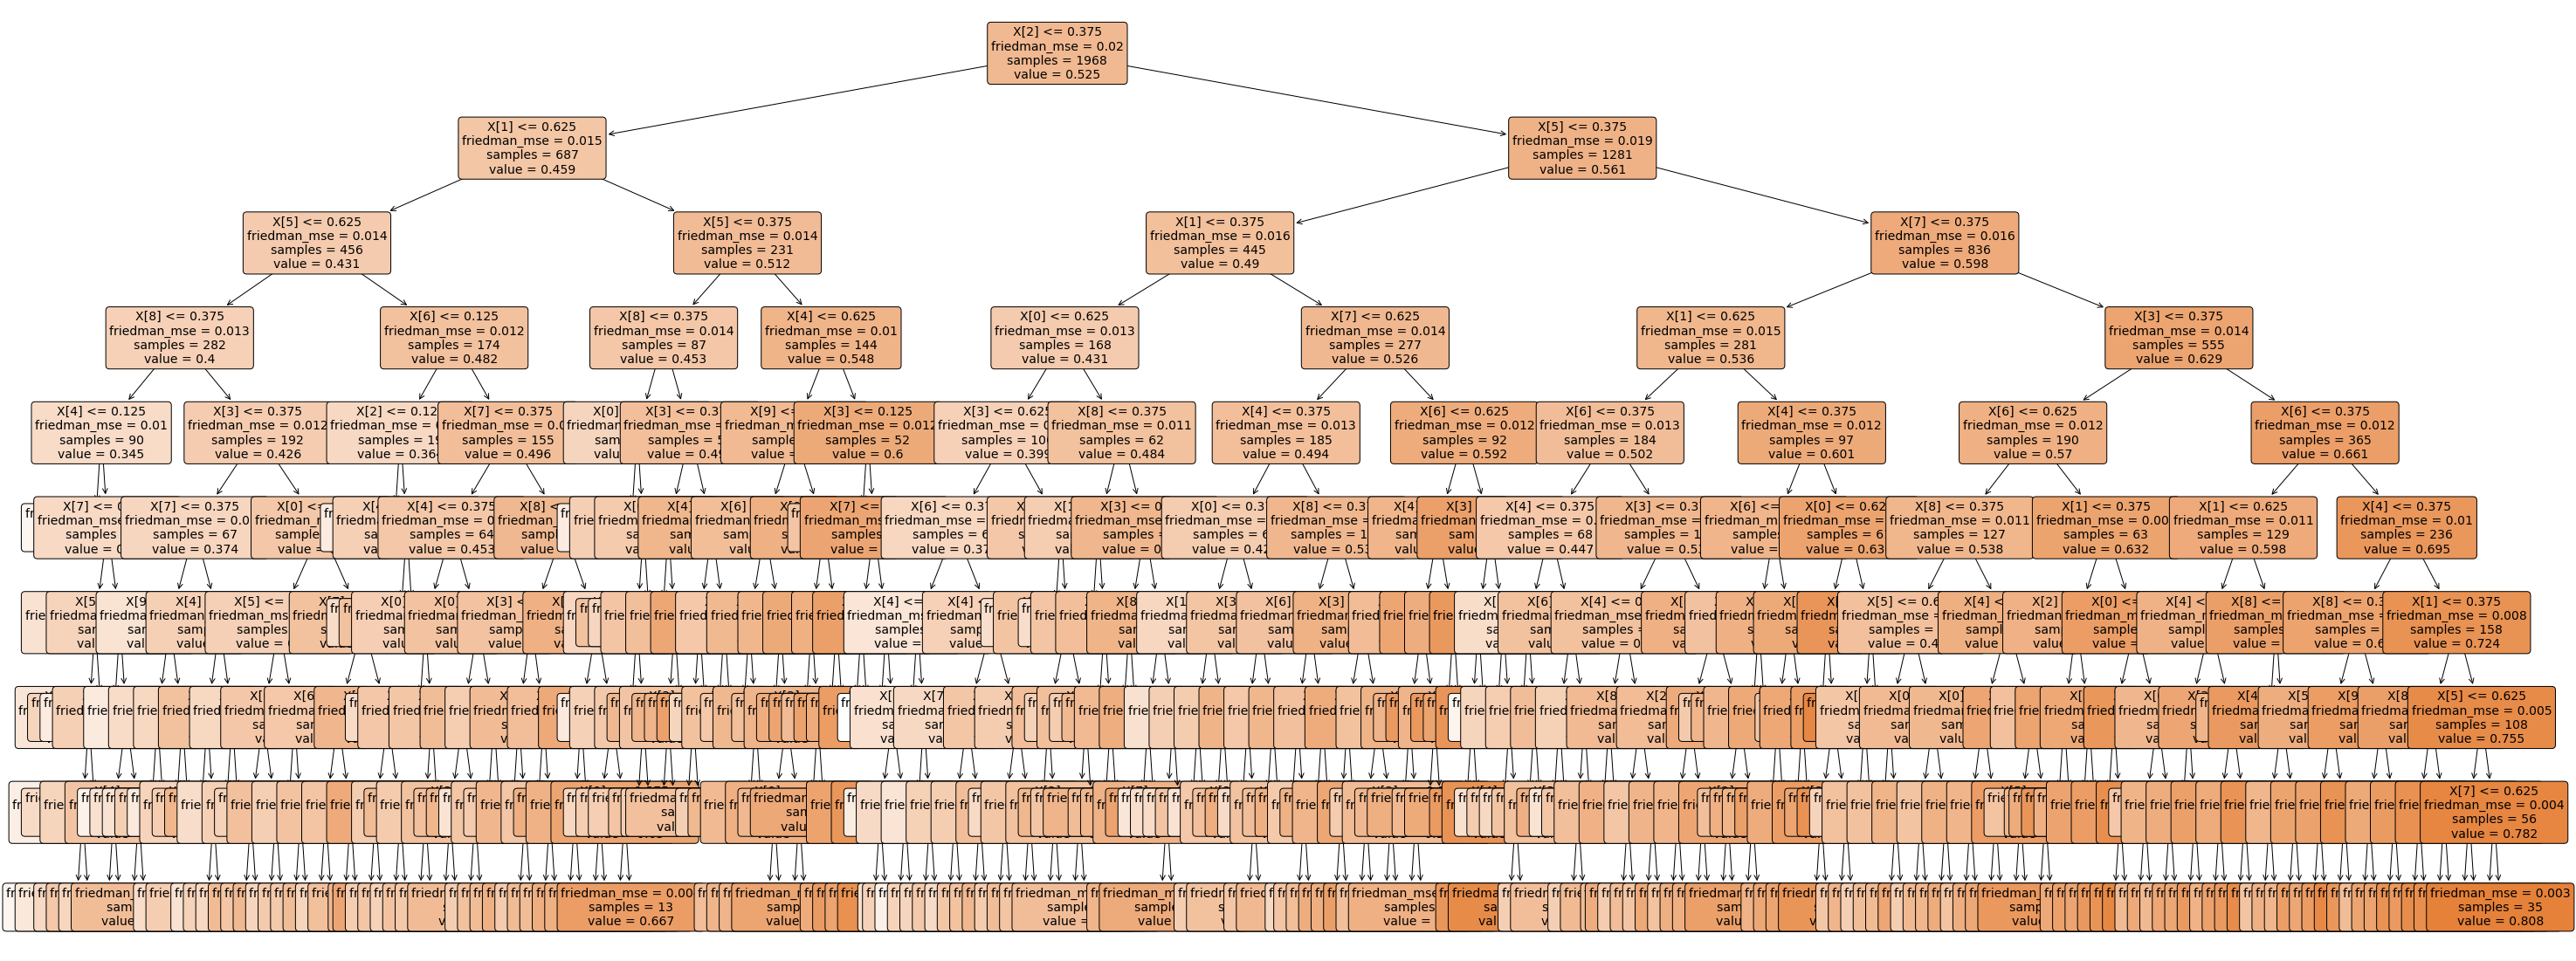

In [138]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


# Create the decision tree regressor
regressor = DecisionTreeRegressor(criterion='friedman_mse',max_depth=9, min_samples_split= 10, min_samples_leaf=3)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Visualize the decision tree
#plt.figure(figsize=(30, 26))
#plot_tree(regressor, feature_names=X.columns, filled=True)
#plt.show()

plt.figure(figsize=(50,20))
plot_tree(regressor,filled=True, 
              rounded=True, 
              fontsize=14);
plt.show()

In [135]:
#performance measure metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 0.008526547715094984
Root Mean Squared Error (RMSE): 0.09233930752986501
Mean Absolute Error (MAE): 0.07427956958092874
R-squared (R²): 0.568694584996133


In [139]:
#Feature Importance

importance = regressor.feature_importances_
feature_names = X.columns

# Create a dataframe of feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

          Feature  Importance
5   Gd_carre_oppo    0.161712
2    mang_support    0.160685
1          engage    0.119687
7      fair_compe    0.106586
4  recog_for_work    0.100797
3     growth_room    0.099926
6        stay2_yr    0.096186
8     value_align    0.073376
0         Recomnd    0.064732
9             PTO    0.016313


In [140]:
from sklearn.tree import export_text

# Extract rules from the decision tree with limited depth
rules = export_text(regressor, feature_names=list(X.columns), max_depth=3)
print(rules)

|--- mang_support <= 0.38
|   |--- engage <= 0.62
|   |   |--- Gd_carre_oppo <= 0.62
|   |   |   |--- value_align <= 0.38
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- value_align >  0.38
|   |   |   |   |--- truncated branch of depth 6
|   |   |--- Gd_carre_oppo >  0.62
|   |   |   |--- stay2_yr <= 0.12
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- stay2_yr >  0.12
|   |   |   |   |--- truncated branch of depth 6
|   |--- engage >  0.62
|   |   |--- Gd_carre_oppo <= 0.38
|   |   |   |--- value_align <= 0.38
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- value_align >  0.38
|   |   |   |   |--- truncated branch of depth 5
|   |   |--- Gd_carre_oppo >  0.38
|   |   |   |--- recog_for_work <= 0.62
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- recog_for_work >  0.62
|   |   |   |   |--- truncated branch of depth 6
|--- mang_support >  0.38
|   |--- Gd_carre_oppo <= 0.38
|   |   |--- engage <= 0.38
|   |   |   |

# Gradient Boosting

In [152]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gb_regressor = GradientBoostingRegressor()

# Train the model
gb_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_regressor.predict(X_test)


Mean Squared Error: 0.00105062972935185


In [153]:
# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 0.00105062972935185
R-squared: 0.9468551274707254
Mean Absolute Error (MAE): 0.02504541053646974
Root Mean Squared Error (RMSE): 0.03241341897041795


# Support Vector Machine

In [155]:
from sklearn import svm

# Creating an SVM regressor
regressor = svm.SVR(kernel='linear')

# Training the SVM model
regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(X_test)


In [156]:
# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error: 0.0015397860508785009
R-squared: 0.9221117286993428
Mean Absolute Error (MAE): 0.03186736029055875
Root Mean Squared Error (RMSE): 0.039240107681790336


# Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)



In [159]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.0028614590419086534
R-squared: 0.8552564506966779
Mean Absolute Error (MAE): 0.042671205396323894
Root Mean Squared Error (RMSE): 0.05349260735754664


In [168]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already trained your Random Forest Regressor model and stored it in rf_model
# Assuming you have X_test as your test data and y_test as the corresponding true values

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Get the predictions on the test data
y_pred = rf_model.predict(X_test)

# Perform bootstrapping to calculate confidence intervals
n_bootstrap = 1000  # Number of bootstrap samples
bootstrap_predictions = []

for i in range(n_bootstrap):
    # Generate a bootstrap sample by resampling with replacement
    indices = np.random.choice(len(X_test), len(X_test), replace=True)
    bootstrap_sample = X_test.iloc[indices]
    
    # Make predictions on the bootstrap sample
    bootstrap_pred = rf_model.predict(bootstrap_sample)
    bootstrap_predictions.append(bootstrap_pred)

# Calculate the confidence intervals
confidence_intervals = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

# Create a dataframe of feature importance
importance = feature_importances
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances and confidence intervals
print("Feature Importances:")
print(feature_importance_df)
print("\nConfidence Intervals:")
print(confidence_intervals)

# Note: The confidence intervals represent the uncertainty in the predictions, not the coefficients.

Feature Importances:
          Feature  Importance
2    mang_support    0.147005
5   Gd_carre_oppo    0.134007
1          engage    0.122820
7      fair_compe    0.105661
3     growth_room    0.103720
6        stay2_yr    0.100244
4  recog_for_work    0.089387
0         Recomnd    0.080027
8     value_align    0.075724
9             PTO    0.041403

Confidence Intervals:
[[0.32316667 0.33272354 0.32808862 ... 0.33280423 0.32830688 0.32923016]
 [0.73957804 0.74556085 0.73374471 ... 0.74385317 0.7457672  0.71978836]]


In [ ]:
pip install tensorflow

In [172]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the R-squared value
r2 = 1 - mse / np.var(y_test)
print("R-squared:", r2)


ModuleNotFoundError: No module named 'tensorflow'